In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', keep_default_na=False)

#Checking the dataset
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
#Check Basic Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
#Data Preprocessing

#Normal and Normal Weight are the same thing, so we will replace Normal Weight with Normal
data['BMI Category'] = data['BMI Category'].replace('Normal Weight', 'Normal')

#We will categorize the blood pressure into three categories: Normal, Prehypertension and Hypertension
def categorize_bp(row):
    systolic, diastolic = map(int, row['Blood Pressure'].split('/'))
    if systolic >= 140 or diastolic >= 90:
        return 'Hypertension'
    elif 120 <= systolic < 140 or 80 <= diastolic < 90:
        return 'Prehypertension'
    else:
        return 'Normal'

data['Blood Pressure'] = data.apply(categorize_bp, axis=1)

#Check the processed Data
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,Prehypertension,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,Prehypertension,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,Prehypertension,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,Hypertension,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,Hypertension,85,3000,Sleep Apnea


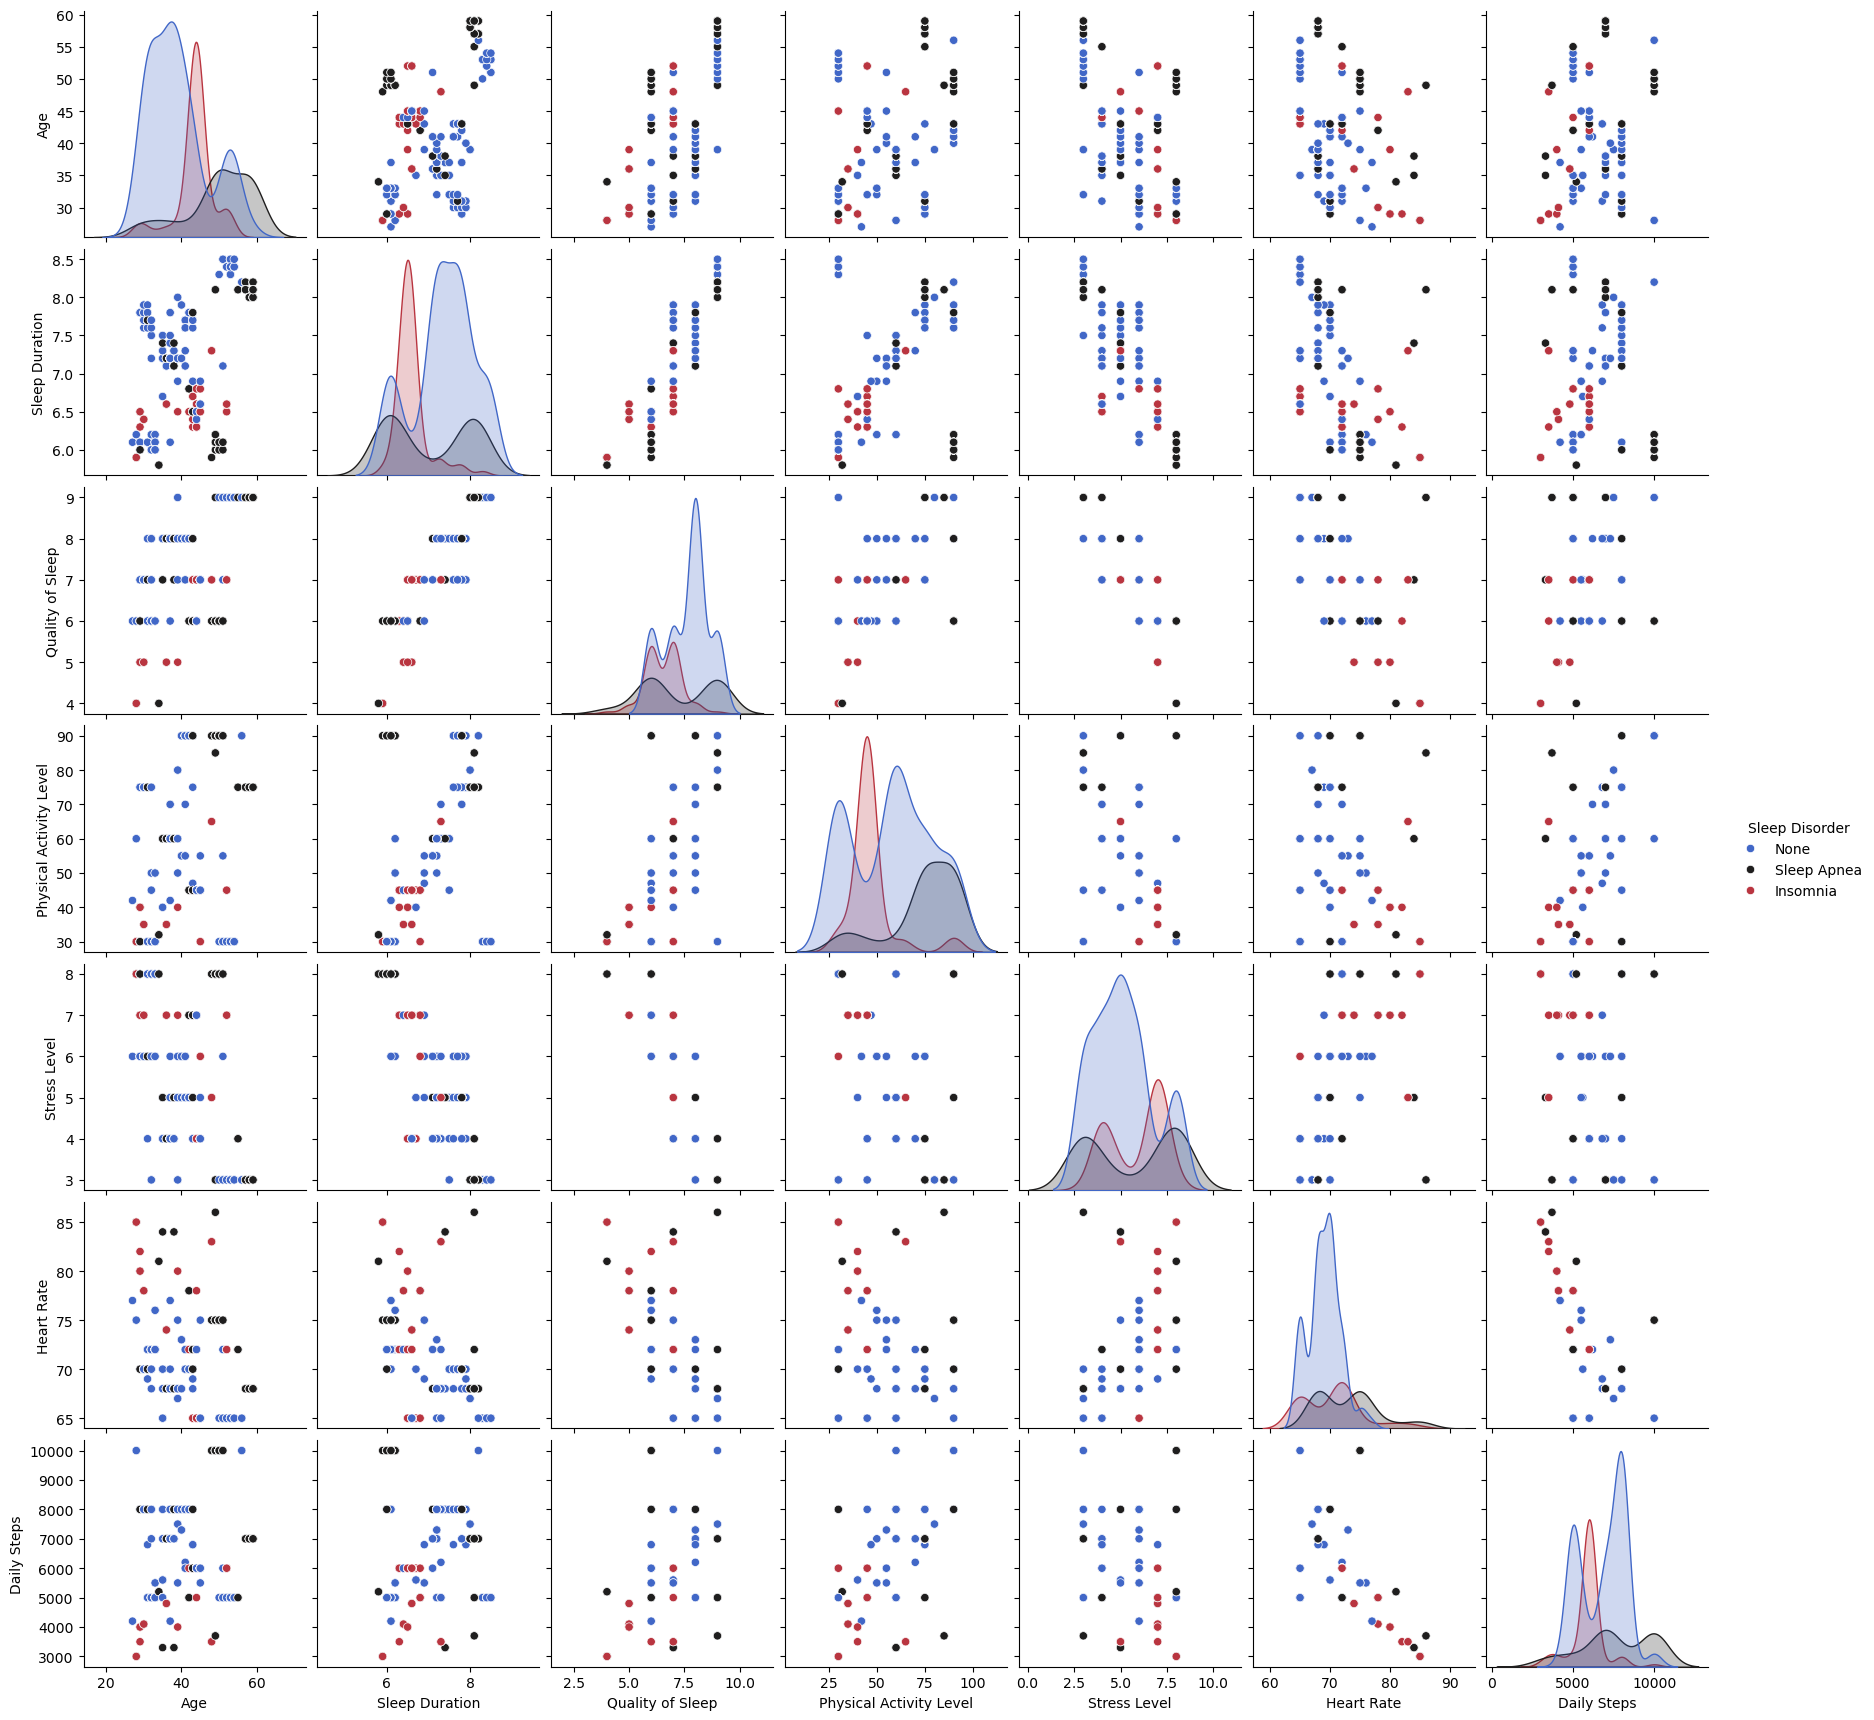

In [5]:
#Pairplot to see the overall relationship between the variables
sns.pairplot(data.drop('Person ID', axis=1), hue='Sleep Disorder', palette='icefire')

Text(0.5, 1.0, 'Boxplot of Gender and Quality of Sleep')

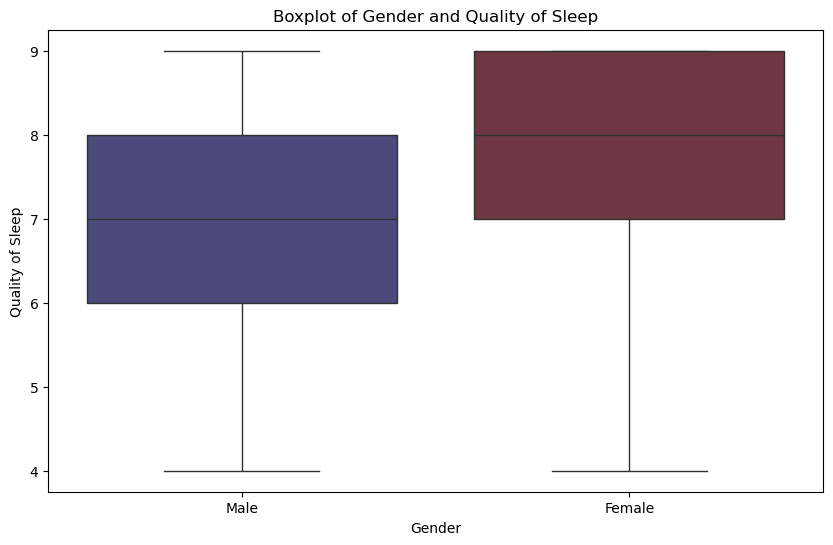

In [6]:
#Gender and Quality of Sleep Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Quality of Sleep', data=data, palette='icefire', hue="Gender")
plt.title('Boxplot of Gender and Quality of Sleep')

Text(0.5, 1.0, 'Scatterplot of Age and Quality of Sleep')

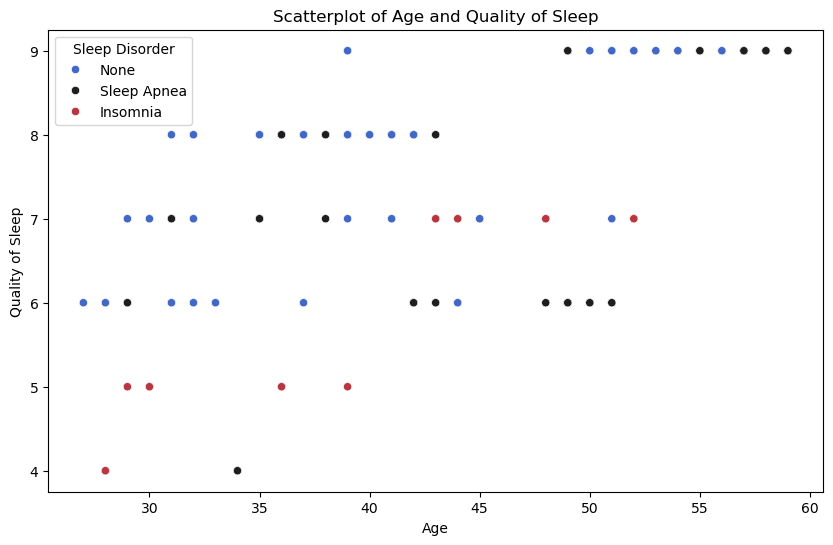

In [7]:
#Age and Quality of Sleep Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Quality of Sleep', data=data, hue='Sleep Disorder', palette='icefire')
plt.title('Scatterplot of Age and Quality of Sleep')

Text(0.5, 1.0, 'Boxplot of BMI Category and Quality of Sleep')

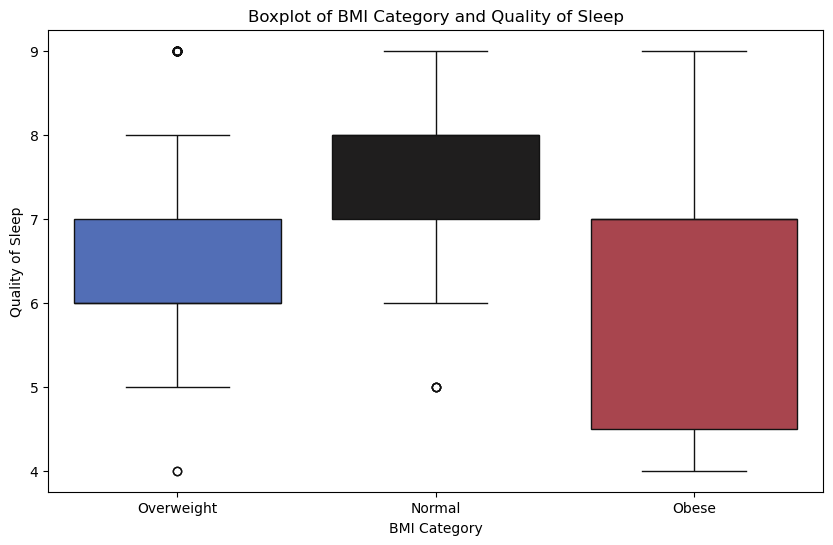

In [8]:
#BMI Category and Quality of Sleep Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Quality of Sleep', data=data, palette='icefire', hue='BMI Category')
plt.title('Boxplot of BMI Category and Quality of Sleep')

Text(0.5, 1.0, 'Scatterplot of Heart Rate and Quality of Sleep')

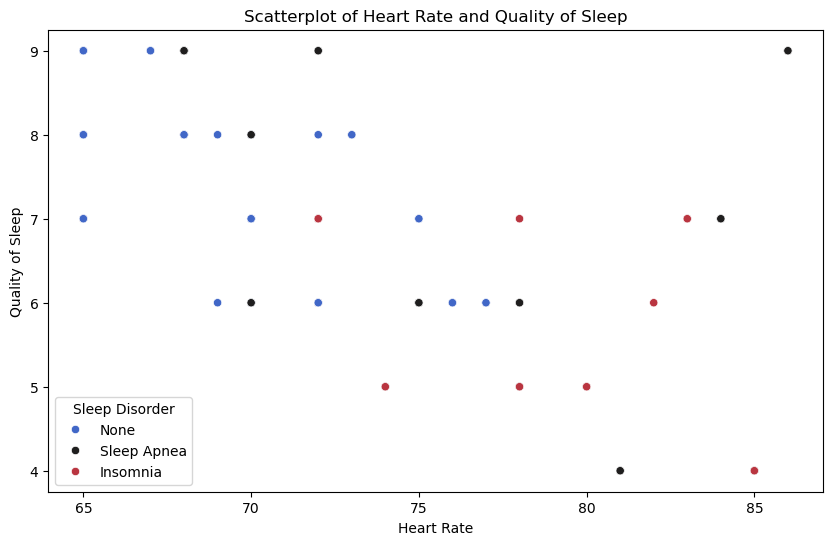

In [9]:
# Plot Heart Rate vs Quality of Sleep
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Heart Rate', y='Quality of Sleep', data=data, hue='Sleep Disorder', palette='icefire')
plt.title('Scatterplot of Heart Rate and Quality of Sleep')

Text(0.5, 1.0, 'Boxplot of Blood Pressure Category and Quality of Sleep')

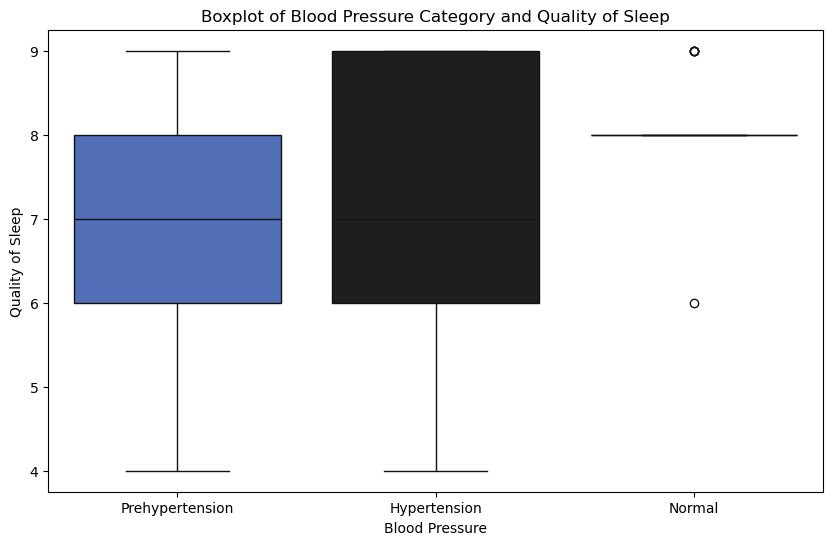

In [10]:
# Plot the categorized blood pressure with quality of sleep
plt.figure(figsize=(10, 6))
sns.boxplot(x='Blood Pressure', y='Quality of Sleep', data=data, palette='icefire', hue='Blood Pressure')
plt.title('Boxplot of Blood Pressure Category and Quality of Sleep')

Text(0.5, 1.0, 'Scatterplot of Physical Activity Level and Quality of Sleep')

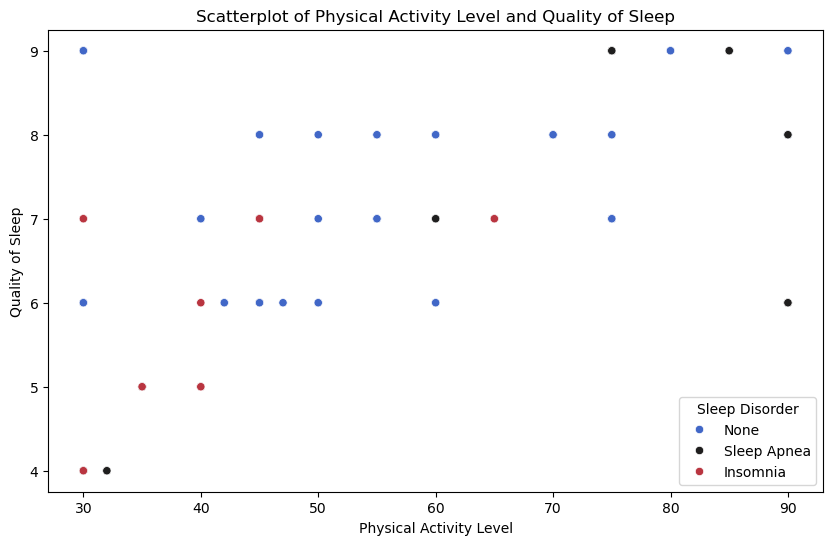

In [11]:
# Physical Activity Level and Quality of Sleep Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Physical Activity Level', y='Quality of Sleep', data=data, hue='Sleep Disorder', palette='icefire')
plt.title('Scatterplot of Physical Activity Level and Quality of Sleep')

Text(0.5, 1.0, 'Scatterplot of Daily Steps and Quality of Sleep')

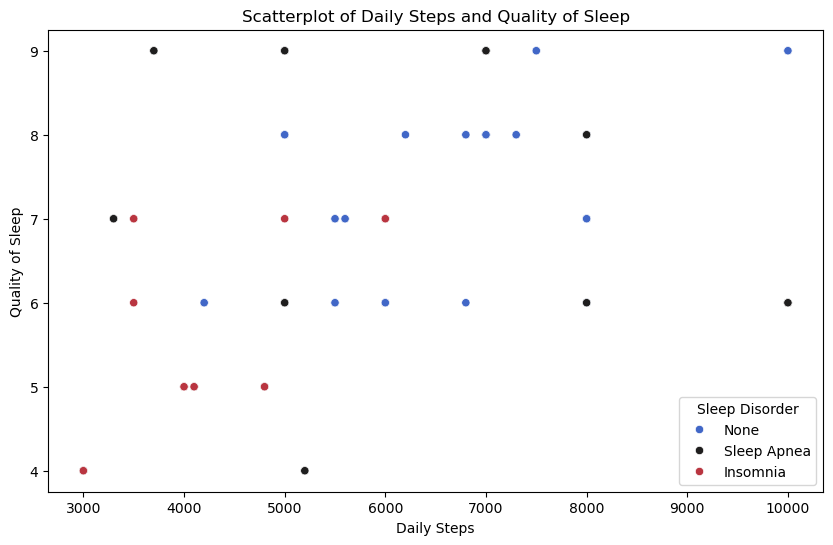

In [12]:
# Daily Steps and Quality of Sleep Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Steps', y='Quality of Sleep', data=data, hue='Sleep Disorder', palette='icefire')
plt.title('Scatterplot of Daily Steps and Quality of Sleep')

Text(0.5, 1.0, 'Scatterplot of Stress Level and Quality of Sleep')

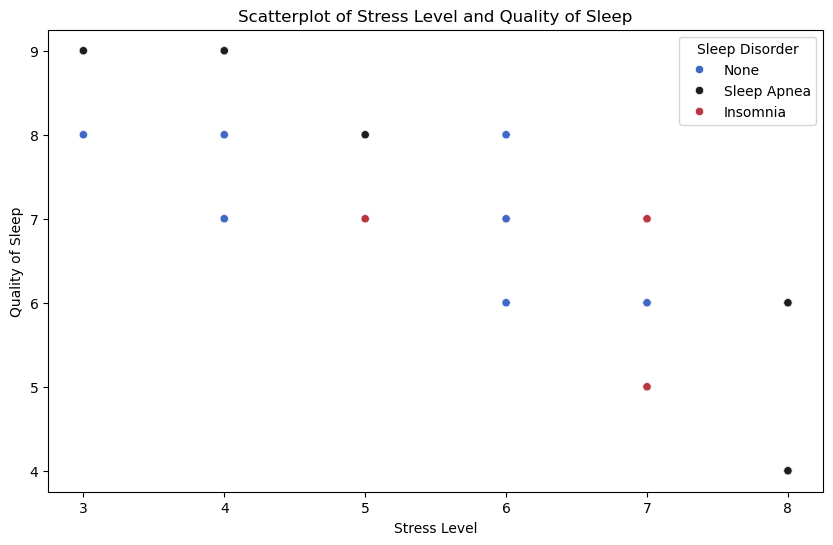

In [13]:
# Stress Level and Quality of Sleep Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Stress Level', y='Quality of Sleep', data=data, hue='Sleep Disorder', palette='icefire')
plt.title('Scatterplot of Stress Level and Quality of Sleep')

Text(0.5, 1.0, 'Scatterplot of Sleep Duration and Quality of Sleep')

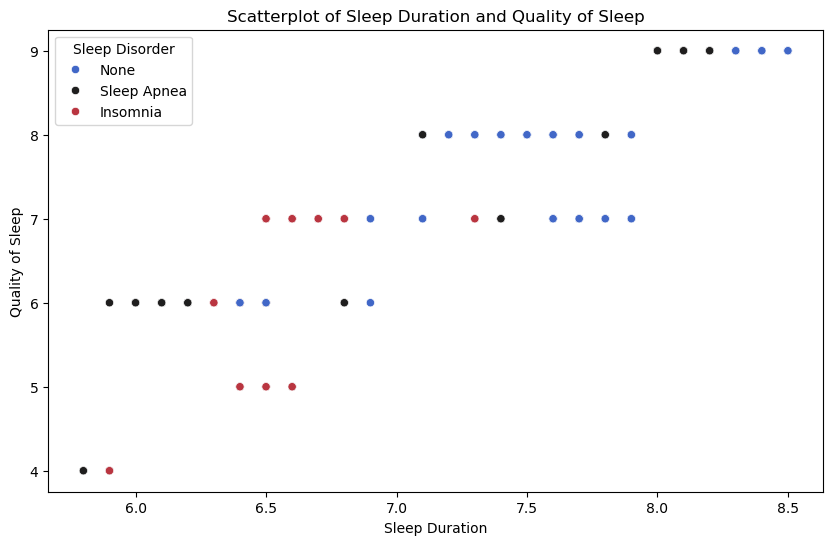

In [14]:
# Sleep Duration and Quality of Sleep Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=data, hue='Sleep Disorder', palette='icefire')
plt.title('Scatterplot of Sleep Duration and Quality of Sleep')

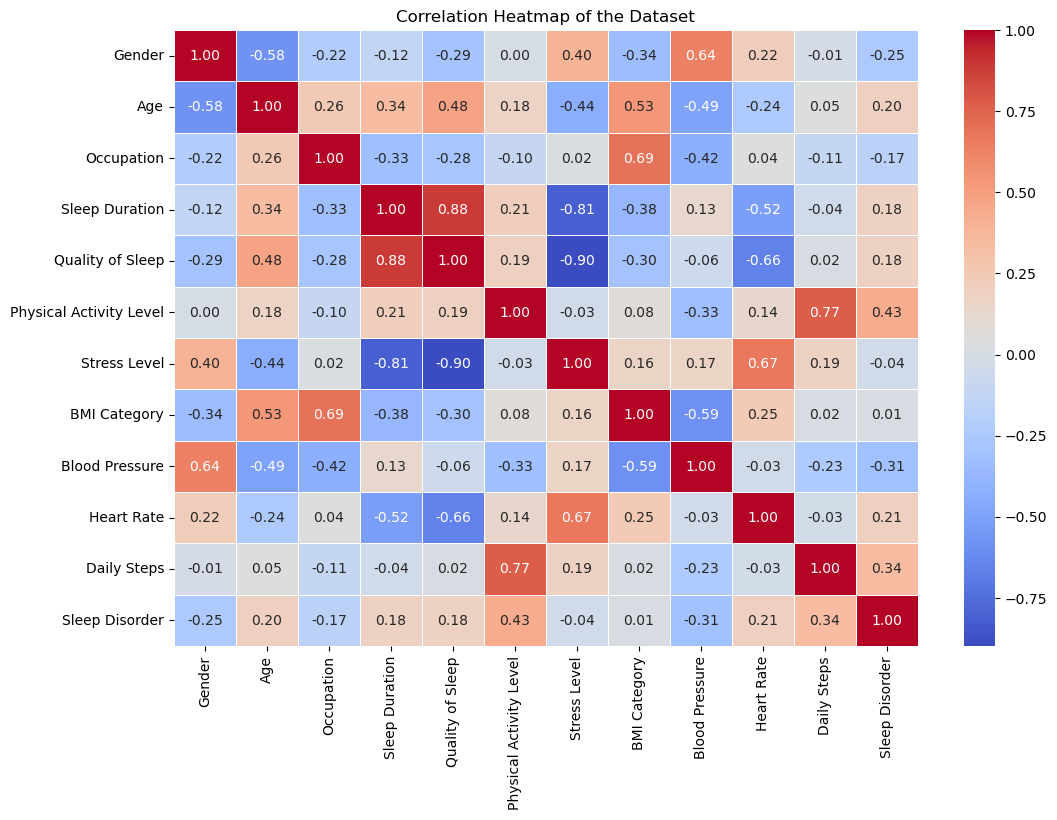

In [15]:
from sklearn.preprocessing import LabelEncoder
#Converting non-numeric data (String or Boolean) into numbers
LE=LabelEncoder()
categories=['Gender','Age','Occupation','BMI Category','Blood Pressure', 'Sleep Disorder']
for label in categories:
    data[label]=LE.fit_transform(data[label])

data.drop('Person ID', axis=1, inplace=True)

#Computing and Generating Correlation Heatmap
corr = data.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of the Dataset')
plt.show()

Text(0.5, 1.0, 'Top 6 Correlation with Quality of Sleep')

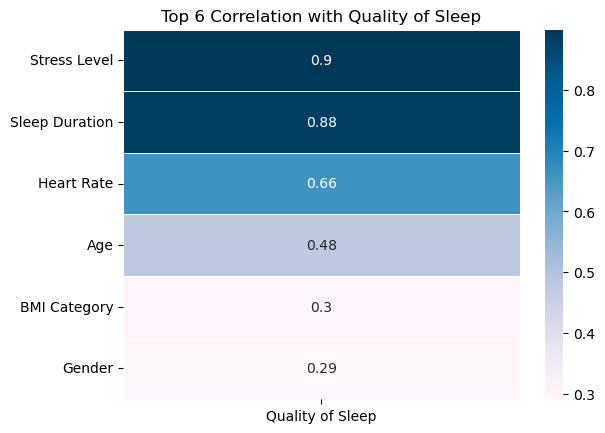

In [16]:
#Display the top 6 correlation
corr = corr.drop('Quality of Sleep', axis=0)
max_6_corr = corr.abs().nlargest(6, 'Quality of Sleep')['Quality of Sleep']
sns.heatmap(max_6_corr.to_frame(), annot=True, cmap='PuBu', linewidths=0.5)
plt.title('Top 6 Correlation with Quality of Sleep')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
# Define the features and target variable
x = data.drop('Quality of Sleep', axis=1)
y = data['Quality of Sleep']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32, shuffle=True)

print("Training set size:", x_train.shape)
print("Testing set size:", x_test.shape)

print("y train shape:", y_train.shape)
print("y test shape:", y_test.shape)

Training set size: (261, 11)
Testing set size: (113, 11)
y train shape: (261,)
y test shape: (113,)


In [23]:
#Create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

#Define the hyperparameters
param_grid = [
    {'classifier': [RandomForestClassifier()],
     'classifier__n_estimators': [50, 100, 200],
     'classifier__max_depth': [None, 5, 10, 15],
     'classifier__min_samples_split': [2, 5, 10],
     'classifier__min_samples_leaf': [1, 2, 5],
     'classifier__max_features': ['sqrt', 'log2']},
    {'classifier': [GradientBoostingClassifier()],
     'classifier__n_estimators': [50, 100, 200],
     'classifier__learning_rate': [0.1, 0.01, 0.001],
     'classifier__max_features': ['sqrt', 'log2']},
    {'classifier': [SVC()],
     'classifier__C': [0.1, 1, 10, 100],
     'classifier__gamma': [1, 0.1, 0.01, 0.001],
     'classifier__kernel': ['linear', 'rbf']},
    {'classifier': [LogisticRegression()],
     'classifier__C': [0.1, 1, 10, 100],
     'classifier__solver': ['lbfgs', 'liblinear']},
    {'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': [3, 5, 7, 9],
     'classifier__weights': ['uniform', 'distance'],
     'classifier__algorithm': ['ball_tree', 'kd_tree', 'brute']},
    {'classifier': [DecisionTreeClassifier()],
     'classifier__criterion': ['gini', 'entropy'],
     'classifier__splitter': ['best', 'random'],
     'classifier__max_depth': [None, 5, 10, 15]}
]

# Grid search
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)

#Get the best model
best_model = grid.best_estimator_

#Get the accuracy, recall, precision, and f1 score of each model
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []
models = ['RandomForestClassifier', 'GradientBoostingClassifier', 'SVC', 'LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier']
for model in models:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', eval(model + '()'))
    ])
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    precision_scores.append(precision)
    f1_scores.append(f1)

c:\Users\dohun\anaconda3\envs\ics\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


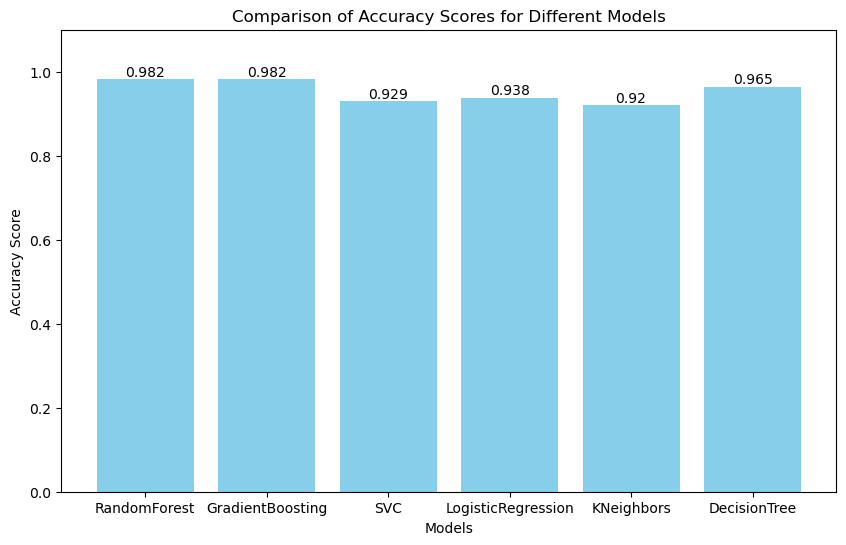

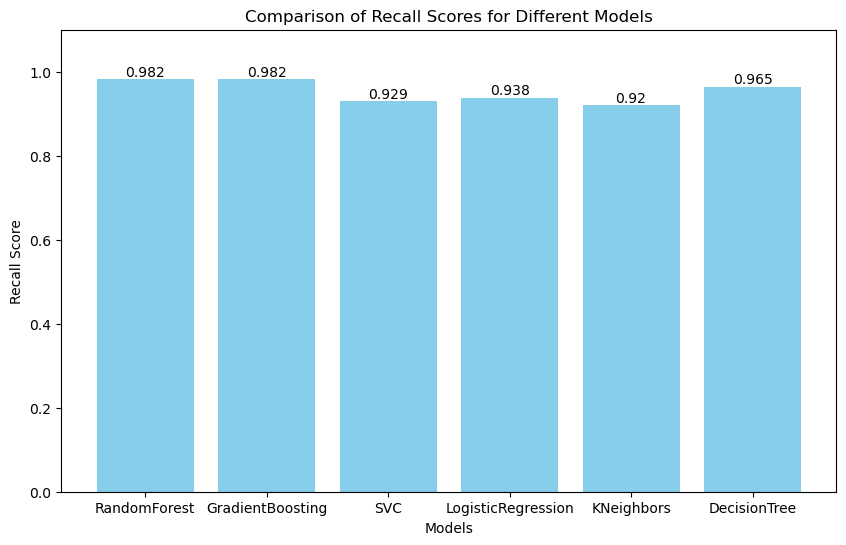

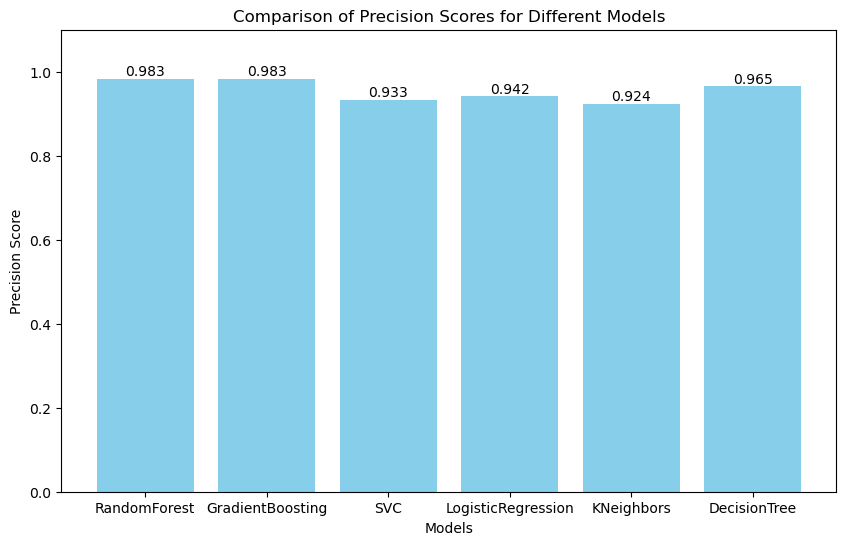

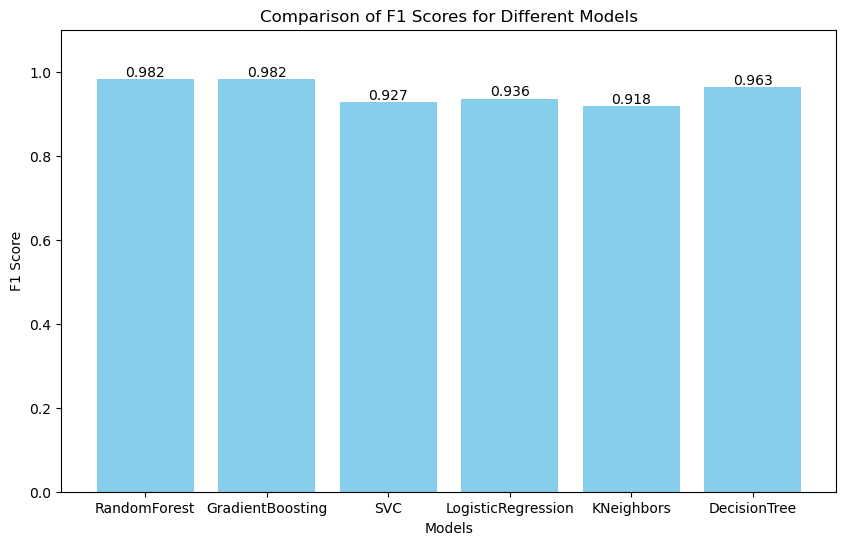

In [24]:
# Define the models
models = ['RandomForest', 'GradientBoosting', 'SVC', 'LogisticRegression', 'KNeighbors', 'DecisionTree']

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores for Different Models')
plt.ylim(0, 1.1)

# Add accuracy values on top of each bar
for bar, score in zip(bars, accuracy_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(score, 3), ha='center', va='bottom')

plt.show()

# Plot the recall scores
plt.figure(figsize=(10, 6))
bars = plt.bar(models, recall_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.title('Comparison of Recall Scores for Different Models')
plt.ylim(0, 1.1)

# Add recall values on top of each bar
for bar, score in zip(bars, recall_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(score, 3), ha='center', va='bottom')

plt.show()

# Plot the precision scores
plt.figure(figsize=(10, 6))
bars = plt.bar(models, precision_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Precision Score')
plt.title('Comparison of Precision Scores for Different Models')
plt.ylim(0, 1.1)

# Add precision values on top of each bar
for bar, score in zip(bars, precision_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(score, 3), ha='center', va='bottom')

plt.show()

# Plot the f1 scores
plt.figure(figsize=(10, 6))
bars = plt.bar(models, f1_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores for Different Models')
plt.ylim(0, 1.1)

# Add f1 values on top of each bar
for bar, score in zip(bars, f1_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(score, 3), ha='center', va='bottom')

plt.show()

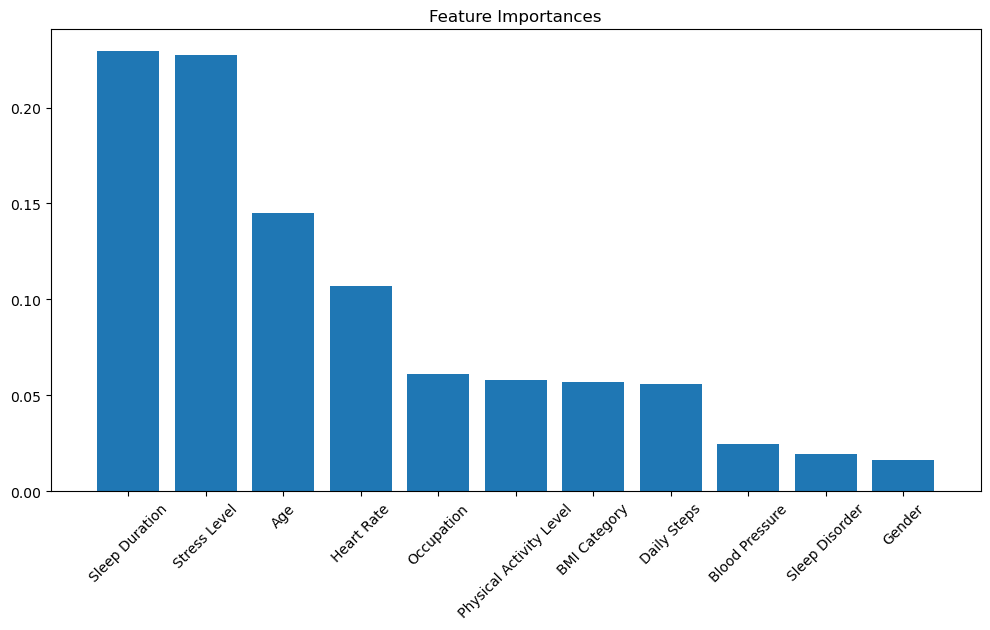

In [25]:
importances = best_model.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]
features = x.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), features[indices], rotation=45)
plt.xlim([-1, x.shape[1]])
plt.show()

In [26]:
import joblib

# Print the best performing model and its hyperparameters
print("\nBest Performing Model:")
for param, value in grid.best_params_.items():
    print(f"{param}: {value}")

# Save the best model
joblib.dump(best_model, 'best_model.pkl')


Best Performing Model:
classifier: RandomForestClassifier()
classifier__max_depth: 5
classifier__max_features: sqrt
classifier__min_samples_leaf: 1
classifier__min_samples_split: 5
classifier__n_estimators: 200


['best_model.pkl']